In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy import units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

In [25]:
total_time = 2.0 * 24.75 * 60.0
map_radius = 1.5 * 60 / 2.   #degrees
osc_period = 67.5 / 2.0 /2.         
n_scans = np.ceil(total_time / (5.0 * 60.0))
scan_duration = total_time / n_scans
phi2 = 2.0 * scan_duration / osc_period
phi1 = 3.14159265 * phi2
n_scans = int(n_scans)
t = np.arange(scan_duration*25)/25.

In [26]:
n_scans = int(n_scans)
az = np.array([])
el = np.array([])
for i in range(n_scans):
    az = np.concatenate([az, map_radius * np.sin(2.*np.pi*t / osc_period + i*phi1) * np.cos(2.*t/osc_period + i*phi2)])
    el = np.concatenate([el, map_radius * np.sin(2.*np.pi*t / osc_period + i*phi1) * np.sin(2.*t/osc_period + i*phi2)])

In [27]:
azspeed = np.diff(az) / np.diff(t)[0]

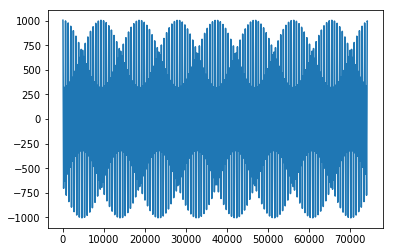

In [28]:
plot(azspeed * 60)

In [5]:
gbt = EarthLocation(lat=38.433*u.deg, lon=-79.84*u.deg, height=800*u.m)

In [6]:
times = Time('2017-4-10 14:00:00', scale='utc', location=gbt) + np.arange(len(az))/25. * u.second

In [7]:
g107 = SkyCoord(l=107.2, b=5.2, unit='deg', frame='galactic')

In [8]:
g107altaz = g107.transform_to(AltAz(obstime=times, location=gbt))

In [9]:
source_az = g107altaz.az.deg
source_el = g107altaz.alt.deg
#source_az[source_az < 100] = source_az[source_az < 100] + 360.

In [10]:
lst = times.sidereal_time('mean').hour

In [11]:
paz = az + source_az
pel = el + source_el

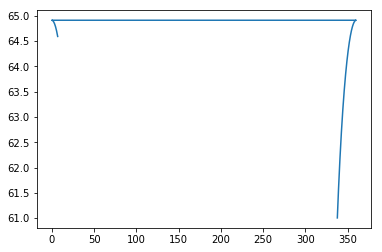

In [12]:
plot(source_az, source_el)

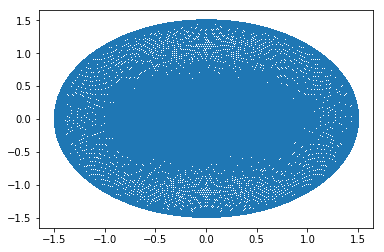

In [13]:
plot(az, el, ',')

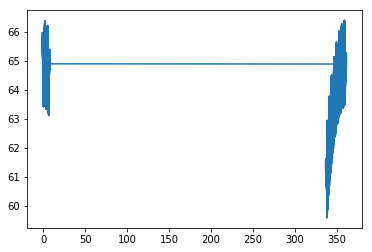

In [14]:
plot(paz, pel)

In [15]:
d2r = np.pi / 180.

In [16]:
rlat = 38.433 * d2r
raz = paz * d2r
rel = pel * d2r

In [17]:
rdec = np.arcsin( np.sin(rel) * np.sin(rlat) - np.cos(rel) * np.cos(raz) * np.cos(rlat) )
dec = rdec / d2r

In [18]:
ha = np.arctan2( np.cos(rel) * np.sin(raz), np.sin(rel) * np.cos(rlat) + np.cos(rel) * np.cos(raz) * np.sin(rlat) )
ha = 24. * ha / (2. * np.pi)
ra = lst - ha

(20, 25)

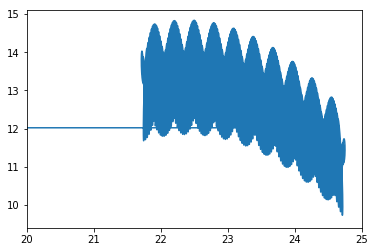

In [19]:
plot(ra, dec)
xlim(20, 25)

In [20]:
from numpy import sin, cos

In [21]:
lstdeg = lst / 24. * 360. 

In [22]:
dec2 = np.arcsin( sin(rel) * sin(rlat) + cos(rel) * cos(rlat) * cos(raz))
lha = np.arctan2( -sin(raz) * cos(rel) / cos(dec2), (sin(rel) - sin(dec2) * sin(rlat)) / (cos(dec2) * cos(rlat)) )

In [23]:
ra2 = (lst - lha/d2r) % 360

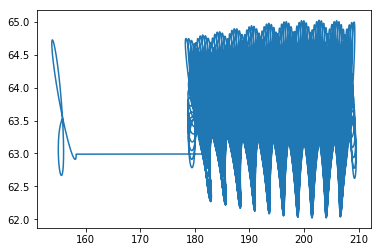

In [24]:
plot( (ra2 + 180.) % 360, dec2/d2r)

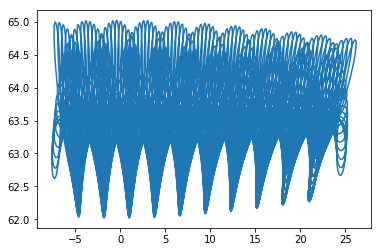

In [25]:
plot(lha/d2r, dec2/d2r)